In [2]:
from ase.io import read
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d, InterpolatedUnivariateSpline
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from pathlib import Path

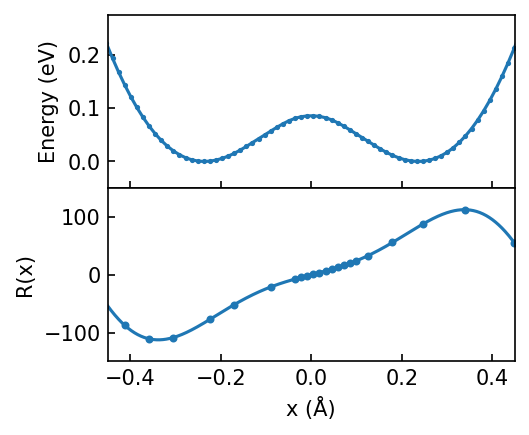

In [3]:
#Fig 1a

energies = np.loadtxt("Data/toten.dat")
energies -= np.min(energies)
x_saddle=0.23589477841686
x = np.linspace(-0.5, 0.9, len(energies))
x=x-x_saddle # to position the saddle point at x=zero
xfine = np.linspace(-0.5, 0.9, 1000)
xfine=xfine-x_saddle # to position the saddle point at x=zero
x_coarse = np.loadtxt("Data/x_1_a2.dat")
Rx_coarse = np.loadtxt("Data/Rx_coarse_1_a2.dat")
Rx_fine = np.loadtxt("Data/Rx_fine_1_a2.dat")
#Rx_coarse_1eV = np.loadtxt("Data/Rx_coarse_1eV.dat")
#Rx_fine_1eV = np.loadtxt("Data/Rx_fine_1eV.dat")
#Rx_coarse_15eV = np.loadtxt("Data/Rx_coarse_15eV.dat")
#Rx_fine_15eV = np.loadtxt("Data/Rx_fine_15eV.dat")
#Rx_coarse_25eV = np.loadtxt("Data/Rx_coarse_25eV.dat")
#Rx_fine_25eV = np.loadtxt("Data/Rx_fine_25eV.dat")

fig1a, (ax0,ax1) = plt.subplots(2, 1, figsize=(3.5, 3), dpi=150, facecolor='white', sharex=True)

ax0.plot(x, energies, 'C0o-', markersize=1.5)
ax0.set_xlim(-0.45, 0.45)
ax0.set_ylim(-0.05, 0.275)
ax0.set_ylabel('Energy (eV)')

ax1.scatter(x_coarse, Rx_coarse, s=8, color='C0')
ax1.plot(xfine, Rx_fine, label = r'$\omega$=2 eV')
# ax1.scatter(x_coarse, Rx_coarse_15eV, s=8, color='C1')
# ax1.plot(xfine, Rx_fine_15eV, color='C1', label = r'$\omega$=1.5 eV')
# ax1.scatter(x_coarse, Rx_coarse_25eV, s=8, color='C2')
# ax1.plot(xfine, Rx_fine_25eV, color='C2', label = r'$\omega$=2.5 eV')
ax1.set_xlim(-0.45, 0.45)
ax1.set_ylim(-150, 150)
ax1.set_xlabel("x (Å)")
ax1.set_ylabel("R(x)")

ax0.tick_params(direction='in', labelbottom=False)
ax1.tick_params(direction='in')

plt.subplots_adjust(hspace=0)
#plt.savefig('Fig1a-multiple_w.pdf', bbox_inches='tight')

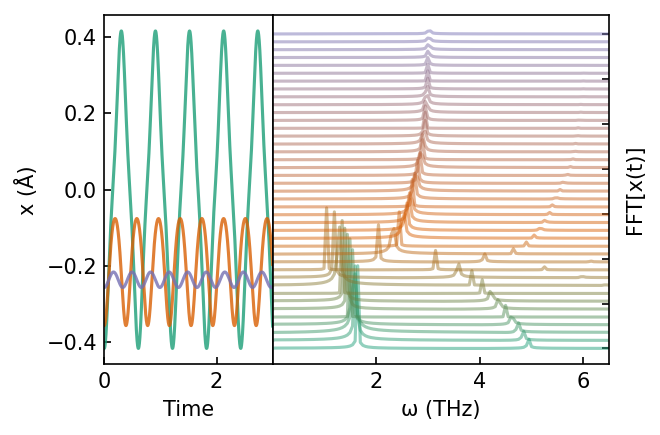

In [34]:
#Figure 1b

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Conversion factors
freq_in_thz = 6.3507799295888985  # converts ω to THz
t_in_ps = 1 / freq_in_thz

tspan = [0, 20 / t_in_ps]
tfine = np.linspace(*tspan, 20000)

# Load the data
sol_x = np.loadtxt('Data/sol_x_1b.dat')    # shape: (N_curves, N_time_points)
fft_x = np.loadtxt('Data/fft_x_1b.dat')    # shape: (N_curves, N_freq_points)
freq_x = np.loadtxt('Data/freq_x_1b.dat')  # shape: (N_freq_points,)

cmap = plt.get_cmap('Dark2')
base_colors = [cmap(i) for i in range(3)]

segment1_cmap = LinearSegmentedColormap.from_list('segment1', [base_colors[0], base_colors[1]], N=15)
segment2_cmap = LinearSegmentedColormap.from_list('segment2', [base_colors[1], base_colors[2]], N=26)
combined_colors = np.vstack((
    segment1_cmap(np.linspace(0, 1, 15)),
    segment2_cmap(np.linspace(0, 1, 26))
))

fig, (ax_time, ax_fft) = plt.subplots(
    1, 2,
    figsize=(4.5, 3),    
    facecolor='white',
    gridspec_kw={'width_ratios': [1, 2], 'wspace': 0.0}
)

# --------------------------------------------------
# Top panel: time‐series x(t) (height ratio = 1)
# --------------------------------------------------
for i in range(sol_x.shape[0]):
    ax_time.plot(
        tfine * t_in_ps,
        sol_x[i],
        color=base_colors[i],
        alpha=0.8
    )

ax_time.set_xlim(0, 3)
ax_time.set_ylabel("x (Å)")
ax_time.set_xlabel("Time")
ax_time.tick_params(direction='in')

# --------------------------------------------------
# Bottom panel: FFT ω vs amplitude (height ratio = 2)
# --------------------------------------------------
for i in range(fft_x.shape[0]):
    ax_fft.plot(
        freq_x,
        fft_x[i] + (i * 0.035),
        color=combined_colors[i],
        alpha=0.48
    )

ax_fft.set_xlabel("ω (THz)")
ax_fft.yaxis.set_label_position("right")
ax_fft.yaxis.tick_right()
ax_fft.set_ylabel("FFT[x(t)]")

ax_fft.set_xlim(0.01, 6.5)
ax_fft.tick_params(direction='in')
ax_fft.set_yticklabels([])  

plt.tight_layout()
plt.savefig('Fig1b_revised.pdf', bbox_inches='tight')

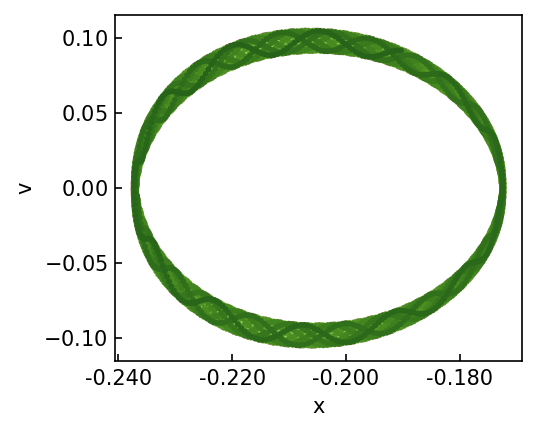

In [9]:
# Fig 1c-- inset

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
    
sol_x_sine = np.loadtxt('Data/sol_x_1c.dat')
sol_v_sine = np.loadtxt('Data/sol_v_1c.dat')

protocol = np.loadtxt('Data/protocol_1c.dat')
norm_protocol = np.loadtxt('Data/norm_protocol_1c.dat')

fig1c, ax3 = plt.subplots(figsize=(3.5, 3), dpi=150, facecolor='white')
norm1 = Normalize(vmin=np.min(tfine), vmax=np.max(tfine*t_in_ps))

ax3.scatter(sol_x_sine, sol_v_sine, c = tfine*t_in_ps, cmap='PiYG', edgecolor='none', norm=norm1, s=8)
ax3.set_xlabel('x')
ax3.set_ylabel('v')
ax3.tick_params(direction='in')
formatter = ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_powerlimits((-2, 2))
ax3.yaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_formatter(FormatStrFormatter('%.3f'))
#plt.savefig('Fig1c.pdf', bbox_inches='tight')

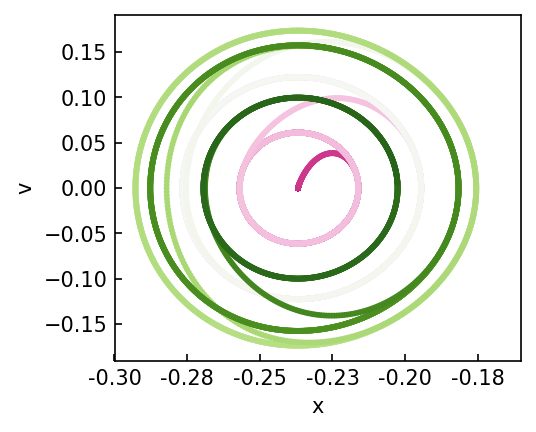

In [10]:
# Fig 1c--- inset

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
    
sol_x_pulse = np.loadtxt('Data/sol_x_1d.dat')
sol_v_pulse = np.loadtxt('Data/sol_v_1d.dat')

protocol2 = np.loadtxt('Data/protocol_1d.dat')
norm_protocol2 = np.loadtxt('Data/norm_protocol_1d.dat')

fig1d, ax4 = plt.subplots(figsize=(3.5, 3), dpi=150, facecolor='white')
norm1 = Normalize(vmin=np.min(tfine), vmax=np.max(tfine*t_in_ps))

ax4.scatter(sol_x_pulse, sol_v_pulse, c = tfine*t_in_ps, cmap='PiYG', edgecolor='none', norm=norm1, s=8)
ax4.set_xlabel('x')
ax4.set_ylabel('v')
ax4.tick_params(direction='in')
ax4.set_xlim(-0.30,-0.16)
ax4.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))

#plt.savefig('Fig1d.pdf', bbox_inches='tight')


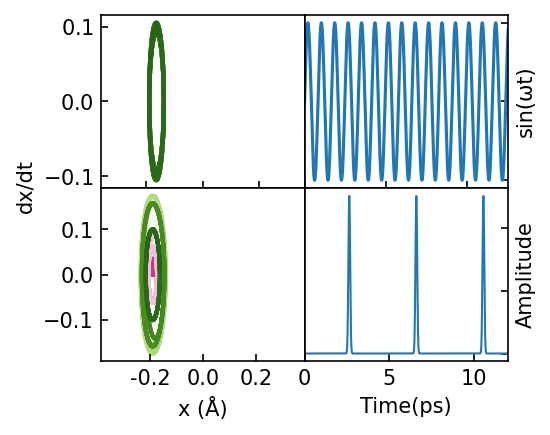

In [11]:
# Fig 1cd

from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import FormatStrFormatter
    
sol_x_sine = np.loadtxt('Data/sol_x_1c.dat')
sol_v_sine = np.loadtxt('Data/sol_v_1c.dat')

protocol = np.loadtxt('Data/protocol_1c.dat')
norm_protocol = np.loadtxt('Data/norm_protocol_1c.dat')

sol_x_pulse = np.loadtxt('Data/sol_x_1d.dat')
sol_v_pulse = np.loadtxt('Data/sol_v_1d.dat')

protocol2 = np.loadtxt('Data/protocol_1d.dat')
norm_protocol2 = np.loadtxt('Data/norm_protocol_1d.dat')

fig1cd, axs = plt.subplots(2,2,figsize=(3.5, 3), dpi=150, facecolor='white')
(ax3, ax4, ax5, ax6) = axs.flatten()
norm1 = Normalize(vmin=np.min(tfine), vmax=np.max(tfine*t_in_ps))

ax3.scatter(sol_x_sine, sol_v_sine, c = tfine*t_in_ps, cmap='PiYG', edgecolor='none', norm=norm1, s=4)
ax4.plot(tfine, protocol)

ax3.set_xlabel('x')
ax3.tick_params(direction='in')
ax4.set_xlabel('Time(ps)')
ax4.set_ylabel('sin(ωt)', labelpad=0.1)
ax3.set_xlim(-0.45, 0.45)
formatter = ScalarFormatter(useOffset=True, useMathText=True)
formatter.set_powerlimits((-2, 2))
ax3.yaxis.set_major_formatter(formatter)
ax3.set_xticklabels([])
ax4.set_xlim(0,5)
ax4.tick_params(direction='in')
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()

ax5.scatter(sol_x_pulse, sol_v_pulse, c = tfine*t_in_ps, cmap='PiYG', edgecolor='none', norm=norm1, s=4)
ax6.plot(tfine*t_in_ps, protocol2, linewidth=1)

ax5.set_xlabel('x (Å)')
ax5.tick_params(direction='in')
ax5.set_xlim(-0.48, 0.48)
ax5.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax6.set_xlabel('Time(ps)')
ax6.yaxis.set_label_position("right")
ax6.yaxis.tick_right()
ax6.set_ylabel('Amplitude', labelpad=0.1)
ax6.set_xlim(0,12)
ax6.tick_params(direction='in')
ax6.set_yticklabels([])
fig1cd.text(-0.02, 0.50, 'dx/dt', ha='center', va='center', rotation='vertical')
        
plt.subplots_adjust(wspace=0, hspace=0)
#plt.savefig('Fig1cd.pdf', bbox_inches='tight')